# ITI104 Assignment 

## Magdalene Cheong (23A467J)

For the Practical Assignment, you are to demonstrate the application of the Voting and Stacking
methods:

a. Select a suitable toy dataset provided by Scikit-Learn (https://scikitlearn.org/stable/datasets/toy_dataset.html). You may choose to work on a classification or
regression problem.

b. Apply the Voting and Stacking methods on the dataset using Scikit-Learn.

c. Compare the performance between the Voting and Stacking ensembles, as well as the
performance of the ensembles and their respective base estimators.

d. You should use two to five machine learning models that you would have learned in the course,
such as linear regression, logistic regression, K-nearest neighbours, Naïve Bayes, decision
trees/random forests and SVM, as base estimators, and logistic regression, linear regression or
gradient boosted trees as the meta learner (for stacking).

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

pd.options.display.float_format = '{:,.2f}'.format

### Objective

To classify the wine into the 3 classes as accurately as possible. 

### Load data

In [2]:
wine = datasets.load_wine()
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [3]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.60,127.00,2.80,3.06,0.28,2.29,5.64,1.04,3.92,"1,065.00"
1,13.20,1.78,2.14,11.20,100.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,"1,050.00"
2,13.16,2.36,2.67,18.60,101.00,2.80,3.24,0.30,2.81,5.68,1.03,3.17,"1,185.00"
3,14.37,1.95,2.50,16.80,113.00,3.85,3.49,0.24,2.18,7.80,0.86,3.45,"1,480.00"
4,13.24,2.59,2.87,21.00,118.00,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.00


### EDA

In [4]:
df.shape

(178, 13)

In [5]:
# Check data type
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [6]:
# Check for na value
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [7]:
# Check for null value
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [8]:
# Check data stats
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,"1,680.00"


In [9]:
# Check for correlation between features
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.00,0.09,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.07,0.07,0.64
malic_acid,0.09,1.00,0.16,0.29,-0.05,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
ash,0.21,0.16,1.00,0.44,0.29,0.13,0.12,0.19,0.01,0.26,-0.07,0.00,0.22
alcalinity_of_ash,-0.31,0.29,0.44,1.00,-0.08,-0.32,-0.35,0.36,-0.20,0.02,-0.27,-0.28,-0.44
magnesium,0.27,-0.05,0.29,-0.08,1.00,0.21,0.20,-0.26,0.24,0.20,0.06,0.07,0.39
total_phenols,0.29,-0.34,0.13,-0.32,0.21,1.00,0.86,-0.45,0.61,-0.06,0.43,0.70,0.50
flavanoids,0.24,-0.41,0.12,-0.35,0.20,0.86,1.00,-0.54,0.65,-0.17,0.54,0.79,0.49
nonflavanoid_phenols,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1.00,-0.37,0.14,-0.26,-0.50,-0.31
proanthocyanins,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,1.00,-0.03,0.30,0.52,0.33
color_intensity,0.55,0.25,0.26,0.02,0.20,-0.06,-0.17,0.14,-0.03,1.00,-0.52,-0.43,0.32


<AxesSubplot:>

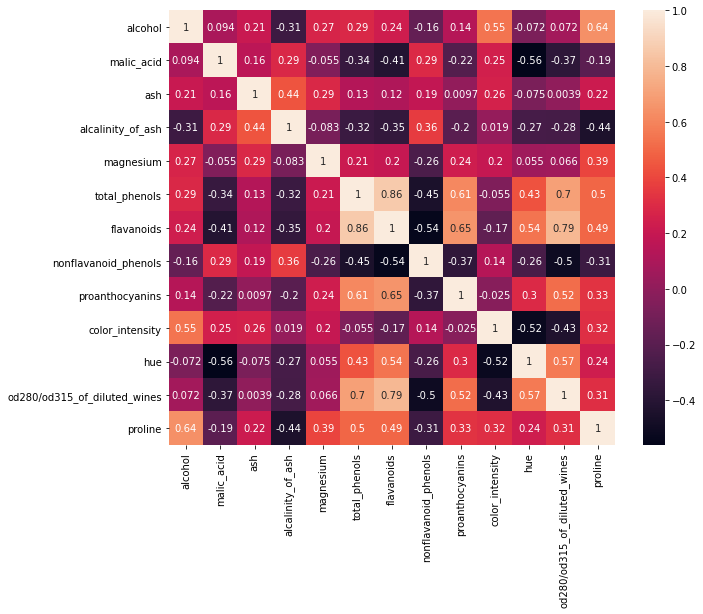

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2g')

In [11]:
pd.Series(wine.target).value_counts().sort_index()

0    59
1    71
2    48
dtype: int64

#### Summary of EDA

1) All the 13 features are float datatype therefore there is no need to convert nominal data.

2) All the features are numeric and are not ordinal hence no transformation is needed.

3) There is also no null or NA values hence imputation or dropna is not needed.

4) There does not appear to have outliers except to note that the max value for color_intensity and proline seems much larger than values at 75-percentile.

5) Generally most of the features are not strongly correlated to another except for:
- correlation between flavanoids and od280/od315_of_diluted_wines (0.79)
- correlation between flavanoids and total_phenol (0.86). The correlation is strong here but at this point it is unclear which feature should be dropped.
- Use decision tree feature_importance_ for feature selection

6) Distribution among the classes are considered balanced.

7) Data is of similar order therefore scaling would not be necessary.

In [12]:
X = wine.data
y = wine.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100, shuffle=True)

### Feature Selection

In [13]:
#define DecisionTree model
tree = tree.DecisionTreeClassifier(random_state=42)

#train the model with train data set
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
#check model accracy in terms of test dataset
acc_tree = tree.score(X_test, y_test)
print("Accuracy for decision tree= %.4f" %acc_tree)

Accuracy for decision tree= 0.8148


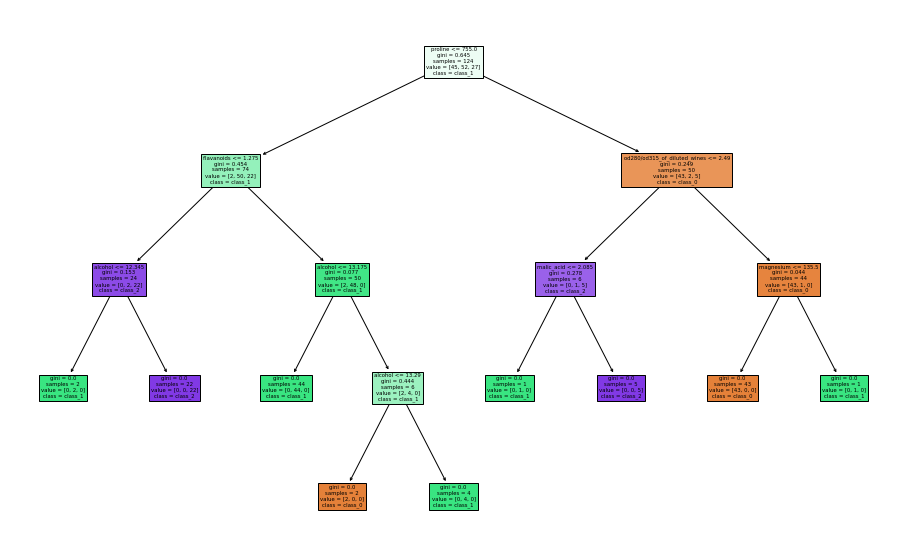

In [15]:
# Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(tree, feature_names=wine.feature_names, class_names=wine.target_names,filled=True)
plt.show()

In [16]:
# Check feature importance
feature_impt = pd.Series(tree.feature_importances_, index=wine.feature_names).sort_values(ascending=False)
feature_impt

proline                        0.42
flavanoids                     0.33
od280/od315_of_diluted_wines   0.11
alcohol                        0.09
magnesium                      0.02
malic_acid                     0.02
hue                            0.00
color_intensity                0.00
proanthocyanins                0.00
nonflavanoid_phenols           0.00
total_phenols                  0.00
alcalinity_of_ash              0.00
ash                            0.00
dtype: float64

Text(0.5, 1.0, 'Feature Importance')

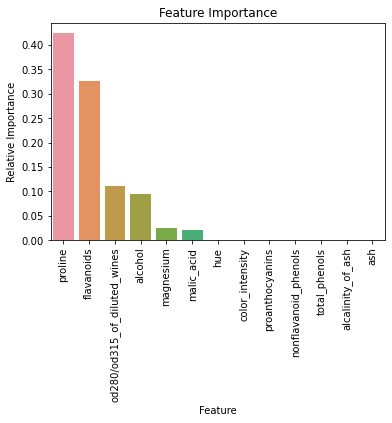

In [17]:
sns.barplot(x= feature_impt.index, y =  feature_impt)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Relative Importance")
plt.title("Feature Importance")

#### Summary of Feature Selection

1) Drop all the features that have zero values.


### Prepare dataset (After feature selection)

In [18]:
# Keep features that are not 0 importance
df_reduced = df[['alcohol', 'malic_acid', 'magnesium', 'flavanoids', 'od280/od315_of_diluted_wines', 'proline']].copy()

In [19]:
# Split reduced dataset
X = df_reduced
y = wine.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100, shuffle=True)

### Decision Tree

Training Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  1.00  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00  1.00      1.00       1.00          1.00
support   45.00 52.00 27.00      1.00     124.00        124.00


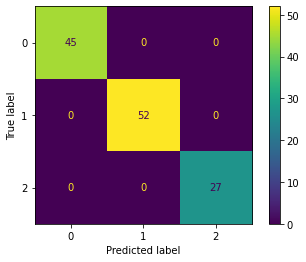

Testing Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.88  0.73  0.88      0.81       0.83          0.82
recall     1.00  0.84  0.67      0.81       0.84          0.81
f1-score   0.93  0.78  0.76      0.81       0.82          0.81
support   14.00 19.00 21.00      0.81      54.00         54.00


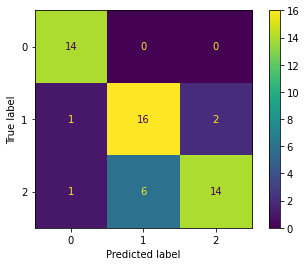

Max_depth:  4


In [20]:
from sklearn import tree

# Define DecisionTree instance
tree = tree.DecisionTreeClassifier(random_state=42)

# Train the model with train data set
tree.fit(X_train,y_train)

# DecisionTreeClassifier training results
y_train_pred = tree.predict(X_train)
report_test=classification_report(y_train,y_train_pred, output_dict=True)
print("Training Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_train,y_train_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_train,y_train_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# DecisionTreeClassifier testing results
y_pred = tree.predict(X_test)
report_test=classification_report(y_test, y_pred, output_dict=True)
print("Testing Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_test, y_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# check max_depth
print("Max_depth: ", tree.tree_.max_depth)

# save testing results into dataframe
df_dt = pd.DataFrame(report_test)
df_dt['model'] = 'DecisionTree'
df_dt_cm = pd.DataFrame(cm)
df_dt_cm ['model'] = 'DecisionTree'
df_dt_cm.rename(columns={0: 'pred 0', 1: 'pred 1', 2: 'pred 2'}, index ={0: 'true 0', 1: 'true 1', 2: 'true 2'}, inplace=True)

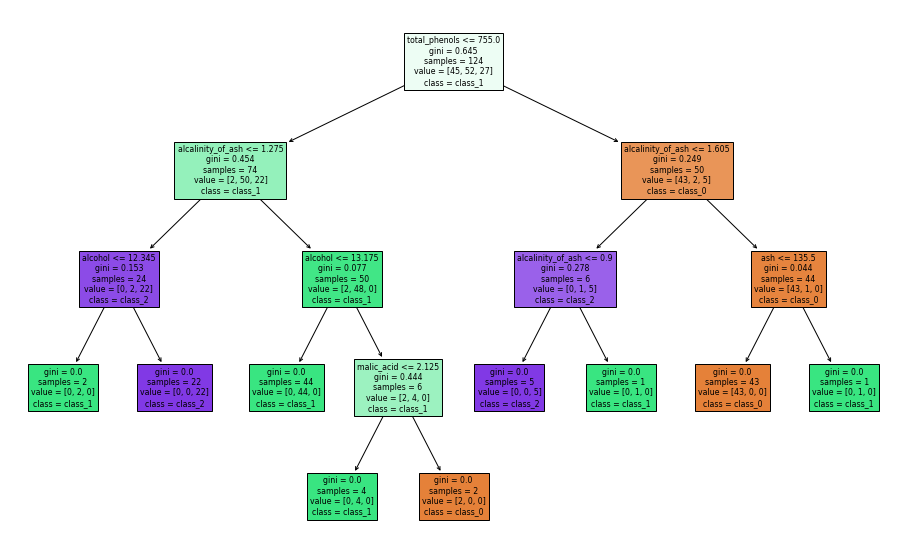

In [21]:
# Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(tree, feature_names=wine.feature_names, class_names=wine.target_names,filled=True)
plt.show()

### Naive Bayes

Training Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.98  0.96  0.90      0.95       0.95          0.95
recall     0.96  0.92  1.00      0.95       0.96          0.95
f1-score   0.97  0.94  0.95      0.95       0.95          0.95
support   45.00 52.00 27.00      0.95     124.00        124.00


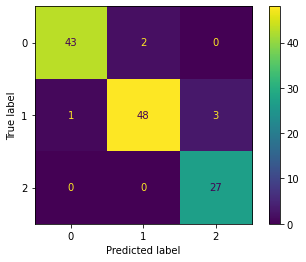

Testing Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  1.00  1.00  0.95      0.98       0.98          0.98
recall     1.00  0.95  1.00      0.98       0.98          0.98
f1-score   1.00  0.97  0.98      0.98       0.98          0.98
support   14.00 19.00 21.00      0.98      54.00         54.00


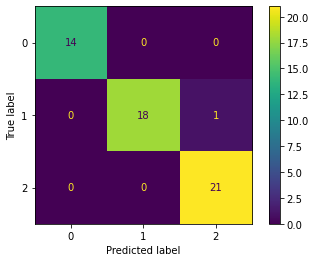

In [22]:
# Define GaussianNB instance
gnb = GaussianNB()

# Train the model with train data set
gnb.fit(X_train,y_train)

# GaussianNB training results
y_train_pred = gnb.predict(X_train)
report_test=classification_report(y_train,y_train_pred, output_dict=True)
print("Training Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_train,y_train_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_train,y_train_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# GaussianNB testing results
y_pred = gnb.predict(X_test)
report_test=classification_report(y_test, y_pred, output_dict=True)
print("Testing Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_test, y_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# save testing results into dataframe
df_nb = pd.DataFrame(report_test)
df_nb['model'] = 'GaussianNB'
df_nb_cm = pd.DataFrame(cm)
df_nb_cm ['model'] = 'GaussianNB'
df_nb_cm.rename(columns={0: 'pred 0', 1: 'pred 1', 2: 'pred 2'}, index ={0: 'true 0', 1: 'true 1', 2: 'true 2'}, inplace=True)

### SVC

Training Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.95  0.91  0.66      0.85       0.84          0.87
recall     0.87  0.79  0.93      0.85       0.86          0.85
f1-score   0.91  0.85  0.77      0.85       0.84          0.85
support   45.00 52.00 27.00      0.85     124.00        124.00


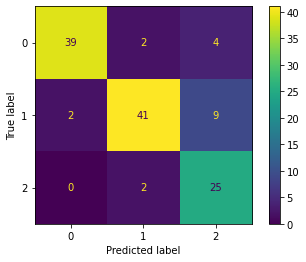

Testing Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.92  0.68  0.84      0.80       0.82          0.81
recall     0.86  0.79  0.76      0.80       0.80          0.80
f1-score   0.89  0.73  0.80      0.80       0.81          0.80
support   14.00 19.00 21.00      0.80      54.00         54.00


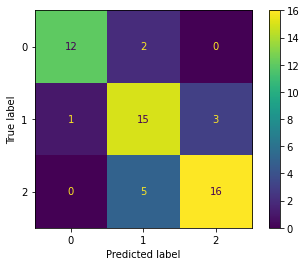

1.0


In [23]:
# Define LinearSVC instance
svc = LinearSVC(random_state=42)

# Train the model with train data set
svc.fit(X_train,y_train)

# LinearSVC training results
y_train_pred = svc.predict(X_train)
report_test=classification_report(y_train,y_train_pred, output_dict=True)
print("Training Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_train,y_train_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_train,y_train_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# LinearSVC testing results
y_pred = svc.predict(X_test)
report_test=classification_report(y_test, y_pred, output_dict=True)
print("Testing Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_test, y_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# save testing results into dataframe
df_svc = pd.DataFrame(report_test)
df_svc['model'] = 'SVC'
df_svc_cm = pd.DataFrame(cm)
df_svc_cm ['model'] = 'SVC'
df_svc_cm.rename(columns={0: 'pred 0', 1: 'pred 1', 2: 'pred 2'}, index ={0: 'true 0', 1: 'true 1', 2: 'true 2'}, inplace=True)

print(svc.C)

### Logistic Regression

Training Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.95  0.94  0.96      0.95       0.95          0.95
recall     0.93  0.94  1.00      0.95       0.96          0.95
f1-score   0.94  0.94  0.98      0.95       0.96          0.95
support   45.00 52.00 27.00      0.95     124.00        124.00


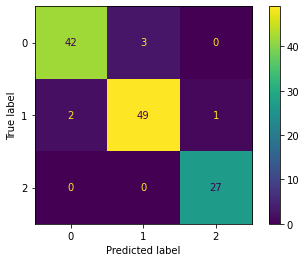

Testing Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.92  0.76  0.90      0.85       0.86          0.86
recall     0.86  0.84  0.86      0.85       0.85          0.85
f1-score   0.89  0.80  0.88      0.85       0.86          0.85
support   14.00 19.00 21.00      0.85      54.00         54.00


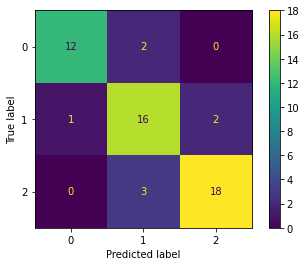

1.0
lbfgs
100


In [24]:
# Define LogisticRegression instance
lgr = LogisticRegression(random_state=42)

# Train the model with train data set
lgr.fit(X_train,y_train)

# LogisticRegression training results
y_train_pred = lgr.predict(X_train)
report_test=classification_report(y_train,y_train_pred, output_dict=True)
print("Training Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_train,y_train_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_train,y_train_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# LogisticRegression testing results
y_pred = lgr.predict(X_test)
report_test=classification_report(y_test, y_pred, output_dict=True)
print("Testing Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_test, y_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# save testing results into dataframe
df_lr = pd.DataFrame(report_test)
df_lr['model'] = 'LogisticReg'
df_lr_cm = pd.DataFrame(cm)
df_lr_cm ['model'] = 'LogisticReg'
df_lr_cm.rename(columns={0: 'pred 0', 1: 'pred 1', 2: 'pred 2'}, index ={0: 'true 0', 1: 'true 1', 2: 'true 2'}, inplace=True)

print(lgr.C)
print(lgr.solver)
print(lgr.max_iter)

### Preliminary results

In [25]:
# consolidate testing results
df = pd.concat([df_dt, df_nb, df_svc, df_lr])
df_cm = pd.concat([df_dt_cm, df_nb_cm, df_svc_cm, df_lr_cm])

In [26]:
print("Consolidated Test Results (Prediction)")
df.sort_index()

Consolidated Test Results (Prediction)


,0,1,2,accuracy,macro avg,weighted avg,model
f1-score,0.93,0.78,0.76,0.81,0.82,0.81,DecisionTree
f1-score,1.00,0.97,0.98,0.98,0.98,0.98,GaussianNB
f1-score,0.89,0.73,0.80,0.80,0.81,0.80,SVC
f1-score,0.89,0.80,0.88,0.85,0.86,0.85,LogisticReg
precision,0.88,0.73,0.88,0.81,0.83,0.82,DecisionTree
precision,1.00,1.00,0.95,0.98,0.98,0.98,GaussianNB
precision,0.92,0.68,0.84,0.80,0.82,0.81,SVC
precision,0.92,0.76,0.90,0.85,0.86,0.86,LogisticReg
recall,1.00,0.84,0.67,0.81,0.84,0.81,DecisionTree
recall,1.00,0.95,1.00,0.98,0.98,0.98,GaussianNB


In [27]:
df_cm

,pred 0,pred 1,pred 2,model
true 0,14,0,0,DecisionTree
true 1,1,16,2,DecisionTree
true 2,1,6,14,DecisionTree
true 0,14,0,0,GaussianNB
true 1,0,18,1,GaussianNB
true 2,0,0,21,GaussianNB
true 0,12,2,0,SVC
true 1,1,15,3,SVC
true 2,0,5,16,SVC
true 0,12,2,0,LogisticReg


#### Summary of Preliminary Results

1) Compare training vs testing results (precision and recall):

- Decision Tree: training accuracy scores a perfect 100% but testing was 81% only. Steepest drop in class 1 precision and class 2 recall. The model is overfitting.
    
- Naive Bayes: comparable accuracy for training and testing (95% vs 98%). Precision and recall for all the classes vary very little; this model performs equally well for all classes.
    
- LinearSVC: training accuracy scores drops slightly from 85% to 81% at testing. Class 1 precision falls by 13%. Class 2 precision increases from 66% to 84% while recall drops from 93% to 76%.
    
- Logistic Regression: training accuracy scores drops from 95% to 85% at testing. Class 1 precision falls by 8%. Recall drop around 10% on average for all classes at prediction.

2) Naive Bayes score the highest in all metrics, followed by logistic regression.

3) Naive Bayes appears to be a good model on its own and ensemble does not seem required. However, for the purpose of this assignment, ensemble method should still be tried to see how performance changes. 

4) Noting that the performance between training and testing differs greatly for the other 3 models, hyperparameter tuning should be done before the ensemble otherwise performance is expected to fall.

### Model Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

### Tune Decision Tree

In [29]:
# Decision tree (tune max_depth. Current is 4)
from sklearn import tree

for max_d in range(1,5):
    tree_tune = tree.DecisionTreeClassifier(max_depth=max_d, random_state=42)
    tree_tune.fit(X_train,y_train)
    y_train_pred = tree_tune.predict(X_train)  
    report_test=classification_report(y_train,y_train_pred, output_dict=True)
    print("max_depth: ", max_d, "training")
    print(pd.DataFrame(report_test))
    y_pred = tree_tune.predict(X_test)
    report_test=classification_report(y_test, y_pred, output_dict=True)
    print("max_depth: ", max_d, "testing")
    print(pd.DataFrame(report_test), '\n')

max_depth:  1 training
              0     1     2  accuracy  macro avg  weighted avg
precision  0.86  0.68  0.00      0.75       0.51          0.60
recall     0.96  0.96  0.00      0.75       0.64          0.75
f1-score   0.91  0.79  0.00      0.75       0.57          0.66
support   45.00 52.00 27.00      0.75     124.00        124.00
max_depth:  1 testing
              0     1     2  accuracy  macro avg  weighted avg
precision  0.82  0.46  0.00      0.57       0.43          0.38
recall     1.00  0.89  0.00      0.57       0.63          0.57
f1-score   0.90  0.61  0.00      0.57       0.50          0.45
support   14.00 19.00 21.00      0.57      54.00         54.00 

max_depth:  2 training
              0     1     2  accuracy  macro avg  weighted avg
precision  0.98  0.96  0.90      0.95       0.95          0.95
recall     0.96  0.92  1.00      0.95       0.96          0.95
f1-score   0.97  0.94  0.95      0.95       0.95          0.95
support   45.00 52.00 27.00      0.95     124.00

#### Decision tree appears to start to overfit from max_depth of 3. While performance of max_depth of 2 is not optimal, it is much better than max_depth of 1 or to overfit. Therefore decision tree model shall use max_depth of 2. 

### Tune LinearSVC

In [30]:
# LinearSVC tuning (tune C. Current is 1)

c_space = np.logspace(-4, -3, 100)
param_grid = {'C': c_space}

svc_tune = LinearSVC(random_state=42)
svc_tune_cv = GridSearchCV(svc_tune, param_grid, cv = 5)
svc_tune_cv.fit(X_train,y_train)
print(svc_tune_cv.best_params_)
print(svc_tune_cv.best_score_)


{'C': 0.0007924828983539178}
0.7819999999999999


#### LinearSVC appears to saturate at best score of around +/-0.78 with a log C value of 0.008. A wider range of log values is first tested and it is found that the best_param always gives a log C value of less than 0. Values above 0 (C=1 and above) all give lower best_score. After some experimenting with range, c_space is finetuned. The best_param is log C of 0.0008 which is equal to C = 1.0018. A quick run of this C value on the LinearSVC model shows similar result. 

In [31]:
# Test results from GridSearch where C = 1.0018

# Define LinearSVC instance
svc_tune = LinearSVC(random_state=42, C = 1.0018)

# Train the model with train data set
svc_tune.fit(X_train,y_train)

# LinearSVC training results
y_train_pred = svc.predict(X_train)
report_test=classification_report(y_train,y_train_pred, output_dict=True)
print("Training Results: ")
print(pd.DataFrame(report_test))

# LinearSVC testing results
y_pred = svc_tune.predict(X_test)
report_test=classification_report(y_test, y_pred, output_dict=True)
print("Testing Results: ")
print(pd.DataFrame(report_test))

# save testing results into dataframe
df_svc_tune = pd.DataFrame(report_test)
df_svc_tune['model'] = 'SVC (after GridSearch tuning)'

df_svc_compare = pd.concat([df_svc, df_svc_tune])
df_svc_compare

Training Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.95  0.91  0.66      0.85       0.84          0.87
recall     0.87  0.79  0.93      0.85       0.86          0.85
f1-score   0.91  0.85  0.77      0.85       0.84          0.85
support   45.00 52.00 27.00      0.85     124.00        124.00
Testing Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.92  0.68  0.84      0.80       0.82          0.81
recall     0.86  0.79  0.76      0.80       0.80          0.80
f1-score   0.89  0.73  0.80      0.80       0.81          0.80
support   14.00 19.00 21.00      0.80      54.00         54.00


,0,1,2,accuracy,macro avg,weighted avg,model
precision,0.92,0.68,0.84,0.80,0.82,0.81,SVC
recall,0.86,0.79,0.76,0.80,0.80,0.80,SVC
f1-score,0.89,0.73,0.80,0.80,0.81,0.80,SVC
support,14.00,19.00,21.00,0.80,54.00,54.00,SVC
precision,0.92,0.68,0.84,0.80,0.82,0.81,SVC (after GridSearch tuning)
recall,0.86,0.79,0.76,0.80,0.80,0.80,SVC (after GridSearch tuning)
f1-score,0.89,0.73,0.80,0.80,0.81,0.80,SVC (after GridSearch tuning)
support,14.00,19.00,21.00,0.80,54.00,54.00,SVC (after GridSearch tuning)


### Tune Logistic Regression

Reference from article: https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69

- lbfgs relatively performs well compared to other methods and it saves a lot of memory, however, sometimes it may have issues with convergence.

- sag faster than other solvers for large datasets, when both the number of samples and the number of features are large.

- saga the solver of choice for sparse multinomial logistic regression and it’s also suitable for very large datasets.

- newton-cg computationally expensive because of the Hessian Matrix.

- liblinearrecommended when you have a high dimension dataset - solving large-scale classification problems.

The other solvers don't seem to suit the size of this dataset, therefore, will keep to lbfgs for this task.

In [32]:
# Logistic Regression tuning (Current is C = 1.0, solver = lbfgs, max_iter = 100)
# Tune C

c_space = np.arange(1, 21, 1)
param_grid= {'C': c_space, 'max_iter': np.arange(100, 1000, 100)}

lgr_tune = LogisticRegression(random_state=42)
lgr_tune_cv = GridSearchCV(lgr_tune, param_grid, cv = 5)
lgr_tune_cv.fit(X_train,y_train)
print(lgr_tune_cv.best_params_)
print(lgr_tune_cv.best_score_)

{'C': 18, 'max_iter': 900}
0.9753333333333334


In [33]:
# Test results from GridSearch where C = 6

# Define LogisticRegression instance
lgr_tune = LogisticRegression(random_state=42, C = 18, max_iter = 900)

# Train the model with train data set
lgr_tune.fit(X_train,y_train)

# LogisticRegression training results
y_train_pred = lgr_tune.predict(X_train)
report_test=classification_report(y_train,y_train_pred, output_dict=True)
print("Training Results: ")
print(pd.DataFrame(report_test))

# LogisticRegression testing results
y_pred = lgr_tune.predict(X_test)
report_test=classification_report(y_test, y_pred, output_dict=True)
print("\nTesting Results: ")
print(pd.DataFrame(report_test))

# save testing results into dataframe
df_lr_tune = pd.DataFrame(report_test)
df_lr_tune['model'] = 'LogisticReg (after GridSearch tuning)'

df_lr_compare = pd.concat([df_lr, df_lr_tune])
df_lr_compare

Training Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.93  0.96  1.00      0.96       0.97          0.96
recall     0.96  0.94  1.00      0.96       0.97          0.96
f1-score   0.95  0.95  1.00      0.96       0.97          0.96
support   45.00 52.00 27.00      0.96     124.00        124.00

Testing Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.92  0.79  0.86      0.85       0.86          0.85
recall     0.86  0.79  0.90      0.85       0.85          0.85
f1-score   0.89  0.79  0.88      0.85       0.85          0.85
support   14.00 19.00 21.00      0.85      54.00         54.00


,0,1,2,accuracy,macro avg,weighted avg,model
precision,0.92,0.76,0.90,0.85,0.86,0.86,LogisticReg
recall,0.86,0.84,0.86,0.85,0.85,0.85,LogisticReg
f1-score,0.89,0.80,0.88,0.85,0.86,0.85,LogisticReg
support,14.00,19.00,21.00,0.85,54.00,54.00,LogisticReg
precision,0.92,0.79,0.86,0.85,0.86,0.85,LogisticReg (after GridSearch tuning)
recall,0.86,0.79,0.90,0.85,0.85,0.85,LogisticReg (after GridSearch tuning)
f1-score,0.89,0.79,0.88,0.85,0.85,0.85,LogisticReg (after GridSearch tuning)
support,14.00,19.00,21.00,0.85,54.00,54.00,LogisticReg (after GridSearch tuning)


#### Logistic Regression has not shown improvement in its results after GridSearch hyperparameter tuning. 

### Model selection discussion

From the results, Naive Bayes Classifer is the top model for this dataset. It appears that an ensemble is not needed however, one of the weakest of Naive Bayes is that it assumes all features to be independent. In real life situation, this is hardly possible. Additionally, Naive Bayes works well with small dataset which could be the reason it performs well here as the dataset has only 178 records. Naive Bayes is also prone to a phenomenon known as poisoning. This terms describes situations where the Naive Bayes Classifier misclassifies uncommon features. In this dataset, based on feature importance study, magnesium and malic acid are significantly less important. It is possible Naive Bayes Classifier mislabels if it is used on a larger or new wine dataset. 

From the correlation data (heatmap), correlation between flavanoids and od280/od315_of_diluted_wines (0.79) and 
correlation between flavanoids and total_phenol (0.86). The correlation is strong which is possible to affect outcome of Naive Bayes. Thus, we can try to augment the model by putting Naive Bayes with other models in an ensemble.

Unlike Naive Bayes, decision tree is prone to overfitting as we observed from the hyperparameter tuning results of decision tree. The results show that increasing max depth by 1 step (from 2 to 3), overfitting takes place. Strength of decision tree is that it can capture non-linear relationships, which means they can be used to classify non-linearly separable data. To capitalise on its strengths but not compromise the ensemble results, less weights can be assigned to Decision Tree.

Performance of SVC is the least favourable among the 4 models evaluated here. Attempts to improve the model performance using GridSearch have not given better results - the optimal C is similar to the origical C used in initial experimentation.

Logistic Regression and Naive Bayes Classifier both use probabilities, but Logistic Regression does not perform equally well with this dataset. The reason could be it is more suitable for larger dataset. Logistic Regression is a linear model; it best predicts when there is a linear relationship between the target labels and the features. It is unclear in this dataset if such a linear relationship exists. Since Logistic Regression and Naive Bayes Classifier are both probabilistic, it is unwise to add Logistic Regression into the ensemble given that there is a huge performance difference between training and prediction. Besides, hyperparameter tuning is also unsuccessful in improving the performance.

The models to be used for ensemble are: Naive Bayes Classifier and Decision Tree.

### Stacking Ensemble (Logistic Regression as meta model)

Training Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.98  0.96  0.90      0.95       0.95          0.95
recall     0.96  0.92  1.00      0.95       0.96          0.95
f1-score   0.97  0.94  0.95      0.95       0.95          0.95
support   45.00 52.00 27.00      0.95     124.00        124.00


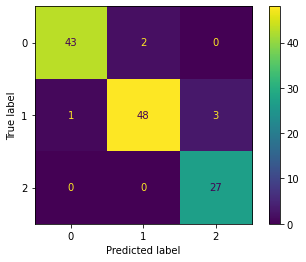

Testing Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.93  0.94  0.95      0.94       0.94          0.94
recall     1.00  0.89  0.95      0.94       0.95          0.94
f1-score   0.97  0.92  0.95      0.94       0.95          0.94
support   14.00 19.00 21.00      0.94      54.00         54.00


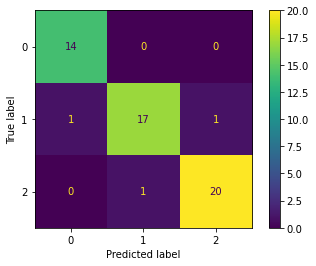

In [34]:
from sklearn.ensemble import StackingClassifier
from sklearn import tree

models = [('gnb',GaussianNB()),('dt', tree.DecisionTreeClassifier(random_state= 42, max_depth= 2))]
lr = LogisticRegression(random_state=42)
stacking_ensemble = StackingClassifier(estimators=models, final_estimator= lr, cv=5)

# Train the model with train data set
stacking_ensemble.fit(X_train, y_train)

# Stacking Ensemble training results
y_train_pred = stacking_ensemble.predict(X_train)
report_test=classification_report(y_train,y_train_pred, output_dict=True)
print("Training Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_train,y_train_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_train,y_train_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# save training results into dataframe
df_stack_train = pd.DataFrame(report_test)
df_stack_train['model'] = 'Stacking training'
df_stack_train_cm = pd.DataFrame(cm)
df_stack_train_cm['model'] = 'Stacking training'
df_stack_train_cm.rename(columns={0: 'pred 0', 1: 'pred 1', 2: 'pred 2'}, index ={0: 'true 0', 1: 'true 1', 2: 'true 2'}, inplace=True)

# Stacking Ensemble testing results
y_pred = stacking_ensemble.predict(X_test)
report_test=classification_report(y_test, y_pred, output_dict=True)
print("Testing Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_test, y_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# save testing results into dataframe
df_stack_test = pd.DataFrame(report_test)
df_stack_test['model'] = 'Stacking testing'
df_stack_test_cm = pd.DataFrame(cm)
df_stack_test_cm['model'] = 'Stacking testing'
df_stack_test_cm.rename(columns={0: 'pred 0', 1: 'pred 1', 2: 'pred 2'}, index ={0: 'true 0', 1: 'true 1', 2: 'true 2'}, inplace=True)


### Voting Ensemble - Hard Voting

Training Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.98  0.98  0.93      0.97       0.96          0.97
recall     0.98  0.94  1.00      0.97       0.97          0.97
f1-score   0.98  0.96  0.96      0.97       0.97          0.97
support   45.00 52.00 27.00      0.97     124.00        124.00


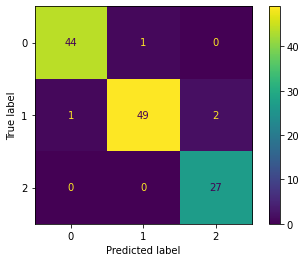

Testing Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.88  0.76  0.94      0.85       0.86          0.86
recall     1.00  0.84  0.76      0.85       0.87          0.85
f1-score   0.93  0.80  0.84      0.85       0.86          0.85
support   14.00 19.00 21.00      0.85      54.00         54.00


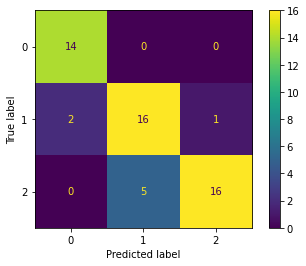

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn import tree

models = [('gnb',GaussianNB()),('dt', tree.DecisionTreeClassifier(random_state= 42, max_depth= 2))]
hard_vote_ensemble = VotingClassifier(estimators=models, voting = 'hard')

# Train the model with train data set
hard_vote_ensemble.fit(X_train, y_train)

# Voting Ensemble (hard) training results
y_train_pred = hard_vote_ensemble.predict(X_train)
report_test=classification_report(y_train,y_train_pred, output_dict=True)
print("Training Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_train,y_train_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_train,y_train_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# save testing results into dataframe
df_hard_vote_train = pd.DataFrame(report_test)
df_hard_vote_train['model'] = 'Voting (hard) training'
df_hard_vote_train_cm = pd.DataFrame(cm)
df_hard_vote_train_cm['model'] = 'Voting (hard) training'
df_hard_vote_train_cm.rename(columns={0: 'pred 0', 1: 'pred 1', 2: 'pred 2'}, index ={0: 'true 0', 1: 'true 1', 2: 'true 2'}, inplace=True)

# Voting Ensemble (hard) testing results
y_pred = hard_vote_ensemble.predict(X_test)
report_test=classification_report(y_test, y_pred, output_dict=True)
print("Testing Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_test, y_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# save testing results into dataframe
df_hard_vote_test = pd.DataFrame(report_test)
df_hard_vote_test['model'] = 'Voting (hard) testing'
df_hard_vote_test_cm = pd.DataFrame(cm)
df_hard_vote_test_cm['model'] = 'Voting (hard) testing'
df_hard_vote_test_cm.rename(columns={0: 'pred 0', 1: 'pred 1', 2: 'pred 2'}, index ={0: 'true 0', 1: 'true 1', 2: 'true 2'}, inplace=True)



### Voting Ensemble - Soft Voting

Training Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  0.98  0.96  0.90      0.95       0.95          0.95
recall     0.96  0.92  1.00      0.95       0.96          0.95
f1-score   0.97  0.94  0.95      0.95       0.95          0.95
support   45.00 52.00 27.00      0.95     124.00        124.00


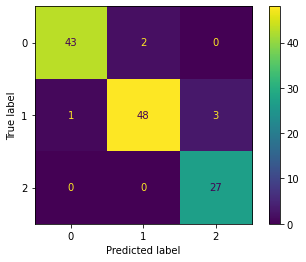

Testing Results: 
              0     1     2  accuracy  macro avg  weighted avg
precision  1.00  1.00  0.95      0.98       0.98          0.98
recall     1.00  0.95  1.00      0.98       0.98          0.98
f1-score   1.00  0.97  0.98      0.98       0.98          0.98
support   14.00 19.00 21.00      0.98      54.00         54.00


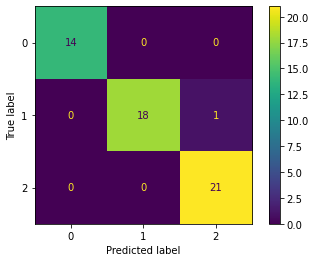

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn import tree

models = [('gnb',GaussianNB()),('dt', tree.DecisionTreeClassifier(random_state= 42, max_depth= 2))]
weights = [0.9, 0.2]
soft_vote_ensemble = VotingClassifier(estimators=models, weights = weights, voting = 'soft')

# Train the model with train data set
soft_vote_ensemble.fit(X_train, y_train)

# Voting Ensemble (soft) training results
y_train_pred = soft_vote_ensemble.predict(X_train)
report_test=classification_report(y_train,y_train_pred, output_dict=True)
print("Training Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_train,y_train_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_train,y_train_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# save testing results into dataframe
df_soft_vote_train = pd.DataFrame(report_test)
df_soft_vote_train['model'] = 'Voting (soft) training (DT weight 0.2)'
df_soft_vote_train_cm = pd.DataFrame(cm)
df_soft_vote_train_cm['model'] = 'Voting (soft) training (DT weight 0.2)'
df_soft_vote_train_cm.rename(columns={0: 'pred 0', 1: 'pred 1', 2: 'pred 2'}, index ={0: 'true 0', 1: 'true 1', 2: 'true 2'}, inplace=True)

# Voting Ensemble (hard) testing results
y_pred = soft_vote_ensemble.predict(X_test)
report_test=classification_report(y_test, y_pred, output_dict=True)
print("Testing Results: ")
print(pd.DataFrame(report_test))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_test, y_pred, labels = [0,1,2]))
cm_display.plot()
plt.show()

# save testing results into dataframe
df_soft_vote_test = pd.DataFrame(report_test)
df_soft_vote_test['model'] = 'Voting (soft) testing (DT weight 0.2)'
df_soft_vote_test_cm = pd.DataFrame(cm)
df_soft_vote_test_cm['model'] = 'Voting (soft) testing (DT weight 0.2)'
df_soft_vote_test_cm.rename(columns={0: 'pred 0', 1: 'pred 1', 2: 'pred 2'}, index ={0: 'true 0', 1: 'true 1', 2: 'true 2'}, inplace=True)

In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn import tree

models = [('gnb',GaussianNB()),('dt', tree.DecisionTreeClassifier(random_state= 42, max_depth= 2))]
weights = [0.9, 0.1]
soft_vote_ensemble = VotingClassifier(estimators=models, weights = weights, voting = 'soft')

# Train the model with train data set
soft_vote_ensemble.fit(X_train, y_train)

# Voting Ensemble (soft) training results
y_train_pred = soft_vote_ensemble.predict(X_train)
report_test=classification_report(y_train,y_train_pred, output_dict=True)
# print("Training Results: ")
# print(pd.DataFrame(report_test))

# save testing results into dataframe
df_soft_vote_train_1 = pd.DataFrame(report_test)
df_soft_vote_train_1['model'] = 'Voting (soft) training (DT weight 0.1)'
df_soft_vote_train_1['weight'] = 0.1

# Voting Ensemble (hard) testing results
y_pred = soft_vote_ensemble.predict(X_test)
report_test=classification_report(y_test, y_pred, output_dict=True)
# print("Testing Results: ")
# print(pd.DataFrame(report_test))

# save testing results into dataframe
df_soft_vote_test_1 = pd.DataFrame(report_test)
df_soft_vote_test_1['model'] = 'Voting (soft) testing (DT weight 0.1)'
df_soft_vote_test_1['weight'] = 0.1

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn import tree

models = [('gnb',GaussianNB()),('dt', tree.DecisionTreeClassifier(random_state= 42, max_depth= 2))]
weights = [0.9, 0.3]
soft_vote_ensemble = VotingClassifier(estimators=models, weights = weights, voting = 'soft')

# Train the model with train data set
soft_vote_ensemble.fit(X_train, y_train)

# Voting Ensemble (soft) training results
y_train_pred = soft_vote_ensemble.predict(X_train)
report_test=classification_report(y_train,y_train_pred, output_dict=True)
# print("Training Results: ")
# print(pd.DataFrame(report_test))

# save testing results into dataframe
df_soft_vote_train_3 = pd.DataFrame(report_test)
df_soft_vote_train_3['model'] = 'Voting (soft) training (DT weight 0.3)'
df_soft_vote_train_3['weight'] = 0.3

# Voting Ensemble (hard) testing results
y_pred = soft_vote_ensemble.predict(X_test)
report_test=classification_report(y_test, y_pred, output_dict=True)
# print("Testing Results: ")
# print(pd.DataFrame(report_test))

# save testing results into dataframe
df_soft_vote_test_3 = pd.DataFrame(report_test)
df_soft_vote_test_3['model'] = 'Voting (soft) testing (DT weight 0.3)'
df_soft_vote_test_3['weight'] = 0.3

In [39]:
from sklearn.ensemble import VotingClassifier
from sklearn import tree

models = [('gnb',GaussianNB()),('dt', tree.DecisionTreeClassifier(random_state= 42, max_depth= 2))]
weights = [0.9, 0.4]
soft_vote_ensemble = VotingClassifier(estimators=models, weights = weights, voting = 'soft')

# Train the model with train data set
soft_vote_ensemble.fit(X_train, y_train)

# Voting Ensemble (soft) training results
y_train_pred = soft_vote_ensemble.predict(X_train)
report_test=classification_report(y_train,y_train_pred, output_dict=True)
# print("Training Results: ")
# print(pd.DataFrame(report_test))

# save testing results into dataframe
df_soft_vote_train_4 = pd.DataFrame(report_test)
df_soft_vote_train_4['model'] = 'Voting (soft) training (DT weight 0.4)'
df_soft_vote_train_4['weight'] = 0.4

# Voting Ensemble (hard) testing results
y_pred = soft_vote_ensemble.predict(X_test)
report_test=classification_report(y_test, y_pred, output_dict=True)
# print("Testing Results: ")
# print(pd.DataFrame(report_test))

# save testing results into dataframe
df_soft_vote_test_4 = pd.DataFrame(report_test)
df_soft_vote_test_4['model'] = 'Voting (soft) testing (DT weight 0.4)'
df_soft_vote_test_4['weight'] = 0.4

### Ensemble Model Comparison

### Compare training results

In [40]:
df_ensemble_train = pd.concat([df_stack_train, df_hard_vote_train, df_soft_vote_train])
df_ensemble_train.sort_index()

,0,1,2,accuracy,macro avg,weighted avg,model
f1-score,0.97,0.94,0.95,0.95,0.95,0.95,Stacking training
f1-score,0.98,0.96,0.96,0.97,0.97,0.97,Voting (hard) training
f1-score,0.97,0.94,0.95,0.95,0.95,0.95,Voting (soft) training (DT weight 0.2)
precision,0.98,0.96,0.90,0.95,0.95,0.95,Stacking training
precision,0.98,0.98,0.93,0.97,0.96,0.97,Voting (hard) training
precision,0.98,0.96,0.90,0.95,0.95,0.95,Voting (soft) training (DT weight 0.2)
recall,0.96,0.92,1.00,0.95,0.96,0.95,Stacking training
recall,0.98,0.94,1.00,0.97,0.97,0.97,Voting (hard) training
recall,0.96,0.92,1.00,0.95,0.96,0.95,Voting (soft) training (DT weight 0.2)
support,45.00,52.00,27.00,0.95,124.00,124.00,Stacking training


#### Training results are comparable among the ensembles.

### Compare testing results

In [41]:
df_ensemble_test = pd.concat([df_stack_test, df_hard_vote_test, df_soft_vote_test])
df_ensemble_test.sort_index()

,0,1,2,accuracy,macro avg,weighted avg,model
f1-score,0.97,0.92,0.95,0.94,0.95,0.94,Stacking testing
f1-score,0.93,0.80,0.84,0.85,0.86,0.85,Voting (hard) testing
f1-score,1.00,0.97,0.98,0.98,0.98,0.98,Voting (soft) testing (DT weight 0.2)
precision,0.93,0.94,0.95,0.94,0.94,0.94,Stacking testing
precision,0.88,0.76,0.94,0.85,0.86,0.86,Voting (hard) testing
precision,1.00,1.00,0.95,0.98,0.98,0.98,Voting (soft) testing (DT weight 0.2)
recall,1.00,0.89,0.95,0.94,0.95,0.94,Stacking testing
recall,1.00,0.84,0.76,0.85,0.87,0.85,Voting (hard) testing
recall,1.00,0.95,1.00,0.98,0.98,0.98,Voting (soft) testing (DT weight 0.2)
support,14.00,19.00,21.00,0.94,54.00,54.00,Stacking testing


#### The best precision and recall comes from Voting Ensemble using soft voting with higher weight given to Naive Bayes (0.9). Weight given to Decision Tree is 0.2. 
#### Hard voting is least performing. The reason could be the good predictions from Naive Bayes Classifier has been 'confused' by less optimal results from Decision Tree so much that the voting caused a degraded performance. It is also with this awareness of performance difference between Naive Bayes and Decision Tree that less weight is given to Decision Tree for the soft voting ensemble.

### Show that the weights designed for Soft Voting is set at best proportion.

In [42]:
df_soft_train = pd.concat([df_soft_vote_train_1, df_soft_vote_train, df_soft_vote_train_3, df_soft_vote_train_4])
df_soft_train['weight'].fillna('0.20', inplace= True)
df_soft_train.sort_index() 

,0,1,2,accuracy,macro avg,weighted avg,model,weight
f1-score,0.97,0.94,0.95,0.95,0.95,0.95,Voting (soft) training (DT weight 0.1),0.10
f1-score,0.97,0.94,0.95,0.95,0.95,0.95,Voting (soft) training (DT weight 0.2),0.20
f1-score,0.97,0.94,0.95,0.95,0.95,0.95,Voting (soft) training (DT weight 0.3),0.30
f1-score,0.97,0.94,0.95,0.95,0.95,0.95,Voting (soft) training (DT weight 0.4),0.40
precision,0.98,0.96,0.90,0.95,0.95,0.95,Voting (soft) training (DT weight 0.1),0.10
precision,0.98,0.96,0.90,0.95,0.95,0.95,Voting (soft) training (DT weight 0.2),0.20
precision,0.98,0.96,0.90,0.95,0.95,0.95,Voting (soft) training (DT weight 0.3),0.30
precision,0.98,0.96,0.90,0.95,0.95,0.95,Voting (soft) training (DT weight 0.4),0.40
recall,0.96,0.92,1.00,0.95,0.96,0.95,Voting (soft) training (DT weight 0.1),0.10
recall,0.96,0.92,1.00,0.95,0.96,0.95,Voting (soft) training (DT weight 0.2),0.20


#### Training results is the same for all weights.

In [43]:
df_soft_test = pd.concat([df_soft_vote_test_1, df_soft_vote_test, df_soft_vote_test_3, df_soft_vote_test_4])
df_soft_test['weight'].fillna('0.20', inplace= True)
df_soft_test.sort_index() 

,0,1,2,accuracy,macro avg,weighted avg,model,weight
f1-score,1.00,0.97,0.98,0.98,0.98,0.98,Voting (soft) testing (DT weight 0.1),0.10
f1-score,1.00,0.97,0.98,0.98,0.98,0.98,Voting (soft) testing (DT weight 0.2),0.20
f1-score,1.00,0.95,0.95,0.96,0.97,0.96,Voting (soft) testing (DT weight 0.3),0.30
f1-score,0.97,0.92,0.95,0.94,0.95,0.94,Voting (soft) testing (DT weight 0.4),0.40
precision,1.00,1.00,0.95,0.98,0.98,0.98,Voting (soft) testing (DT weight 0.1),0.10
precision,1.00,1.00,0.95,0.98,0.98,0.98,Voting (soft) testing (DT weight 0.2),0.20
precision,1.00,0.95,0.95,0.96,0.97,0.96,Voting (soft) testing (DT weight 0.3),0.30
precision,0.93,0.94,0.95,0.94,0.94,0.94,Voting (soft) testing (DT weight 0.4),0.40
recall,1.00,0.95,1.00,0.98,0.98,0.98,Voting (soft) testing (DT weight 0.1),0.10
recall,1.00,0.95,1.00,0.98,0.98,0.98,Voting (soft) testing (DT weight 0.2),0.20


#### Testing results peaks at 0.2 for Decision Tree. Above that precision and recall deteriorate. The same performance is achieved at weight 0.1 but setting at 0.1 is so low the benefits of having a ensemble is much defeated. 

### Compare predictions from Naive Bayes, Decision Tree, Voting Ensemble (soft)

In [44]:
df_final = pd.concat([df_nb, df_dt, df_soft_vote_test])
df_final.sort_index()

,0,1,2,accuracy,macro avg,weighted avg,model
f1-score,1.00,0.97,0.98,0.98,0.98,0.98,GaussianNB
f1-score,0.93,0.78,0.76,0.81,0.82,0.81,DecisionTree
f1-score,1.00,0.97,0.98,0.98,0.98,0.98,Voting (soft) testing (DT weight 0.2)
precision,1.00,1.00,0.95,0.98,0.98,0.98,GaussianNB
precision,0.88,0.73,0.88,0.81,0.83,0.82,DecisionTree
precision,1.00,1.00,0.95,0.98,0.98,0.98,Voting (soft) testing (DT weight 0.2)
recall,1.00,0.95,1.00,0.98,0.98,0.98,GaussianNB
recall,1.00,0.84,0.67,0.81,0.84,0.81,DecisionTree
recall,1.00,0.95,1.00,0.98,0.98,0.98,Voting (soft) testing (DT weight 0.2)
support,14.00,19.00,21.00,0.98,54.00,54.00,GaussianNB


### Conclusion

The final Voting Ensemble model consists of Naive Bayes Classifier and Decision Tree using soft voting. Weight given to Naive Bayes Classifier is 0.9 and to Decision Tree 0.2.

It appears that Naive Bayes Classifier as a single model is sufficient since Voting Ensemble gives the same performance. Recalling that the assumption of Naive Bayes is it assumes all features are independent of one another which is not realistic, retaining the final model as single model Naive Bayes Classifier might give unexpected results from a different set of wine data. Retaining decision tree in the ensemble may help to level out the weaknesses in the Naive Bayes Classifier. At the very least, at the weight given to Decision Tree, its poorer performance on its own has not negatively affected the ensemble performance and both are fast and efficient.